In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [295]:
df_train = pd.read_csv('train.csv', encoding='utf8')
df_test = pd.read_csv('test.csv', encoding='utf8')

In [296]:
df_train.head().T
#df_train.shape
#df_train.info()

,0,1,2,3,4
_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,54,36,53,34,29
job,technician,services,blue-collar,blue-collar,services
marital,married,single,married,married,single
education,professional.course,basic.4y,basic.4y,basic.9y,university.degree
default,unknown,no,no,no,no
housing,no,no,yes,yes,yes
loan,no,no,no,yes,no
contact,cellular,telephone,cellular,telephone,telephone
month,aug,may,aug,may,aug


In [297]:
def preproc_data(df_inp):
    df_out = df_inp.copy()
    df_out = df_out.drop(['month', 'day_of_week','contact'], axis=1)
    df_out['default'] = df_out['default'].replace(to_replace='yes', value='unknown')
    df_out['default'] = df_out['default'].replace({"no": 0, "unknown": -1}).astype('int')
    
    df_out['loan'] = df_out['loan'].replace(to_replace='unknown', value='no')
    df_out['loan'] = df_out['loan'].replace({"no": 0, "yes": 1}).astype('int')
    
    df_out['housing'] = df_out['housing'].replace(to_replace='unknown', value='no')
    df_out['housing'] = df_out['housing'].replace({"no": 0, "yes": 1}).astype('int')
    
    df_out['marital'] = df_out['marital'].replace(to_replace='unknown', value='single')
    
    df_out['poutcome'] = df_out['poutcome'].replace({"failure": -1, "nonexistent": 0, "success": 1}).astype('int')
    
    df_out['education'] = df_out['education'].replace({'basic.4y' :1, 
                                                     'basic.6y' :2, 
                                                     'basic.9y' :3, 
                                                     'high.school' :5, 
                                                     'illiterate' :0, 
                                                     'professional.course' :4, 
                                                     'university.degree' :6, 
                                                     'unknown' :0}).astype('int')
    
    df_out = pd.get_dummies(df_out, columns=['marital', 'job'])
    return df_out

In [298]:
df_train_prep = preproc_data(df_train)

In [299]:
def find_cat(df_inp):
    for name in df_inp.columns:
        s = ''
        s += name
        if (type(df_inp[name][0]) == str):
            s += ' строка'
        if (df_inp[name].nunique() <= 3):
            s += ' мало значений'
        print(s)

In [300]:
find_cat(df_train_prep)

_id строка
age
education
default мало значений
housing мало значений
loan мало значений
duration
campaign
pdays
previous
poutcome мало значений
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
target мало значений
marital_divorced мало значений
marital_married мало значений
marital_single мало значений
job_admin. мало значений
job_blue-collar мало значений
job_entrepreneur мало значений
job_housemaid мало значений
job_management мало значений
job_retired мало значений
job_self-employed мало значений
job_services мало значений
job_student мало значений
job_technician мало значений
job_unemployed мало значений
job_unknown мало значений


In [301]:
df_train_prep[['education','_id']].groupby(by=['education'])['_id'].count()

education
0    1067
1    2523
2    1399
3    3565
4    3112
5    5737
6    7309
Name: _id, dtype: int64

In [302]:
X, y = df_train_prep.drop(['target','_id'], axis=1).values, df_train_prep.target.values

In [303]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)

In [304]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)
model_KN = KNeighborsClassifier()
model_LR = LogisticRegression(random_state=123)

model_DT.fit(X_train,y_train)
model_KN.fit(X_train,y_train)
model_LR.fit(X_train,y_train)

DT_y_hat = model_DT.predict(X_train)
DT_y_hat_proba = model_DT.predict_proba(X_train, )
KN_y_hat = model_KN.predict(X_train)
KN_y_hat_proba = model_KN.predict_proba(X_train, )
LR_y_hat = model_LR.predict(X_train)
LR_y_hat_proba = model_LR.predict_proba(X_train, )

In [305]:
print(roc_auc_score(y_train, DT_y_hat_proba[:, 1]))
print(roc_auc_score(y_train, KN_y_hat_proba[:, 1]))
print(roc_auc_score(y_train, LR_y_hat_proba[:, 1]))

0.9626684391032806
0.9665232642691467
0.9199067976549054


In [306]:
l_DT = [(accuracy_score(y_train, DT_y_hat)), (precision_score(y_train, DT_y_hat)), (recall_score(y_train, DT_y_hat))]
l_KN = [(accuracy_score(y_train, KN_y_hat)), (precision_score(y_train, KN_y_hat)), (recall_score(y_train, KN_y_hat))]
l_LR = [(accuracy_score(y_train, LR_y_hat)), (precision_score(y_train, LR_y_hat)), (recall_score(y_train, LR_y_hat))]

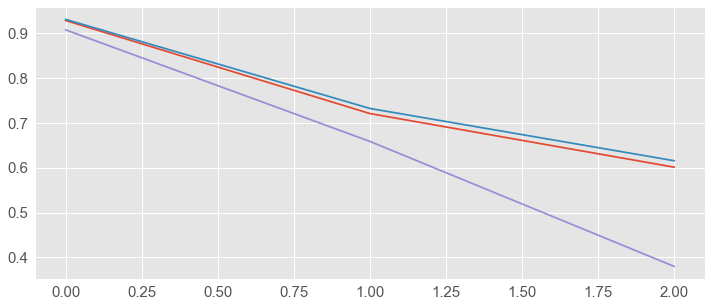

In [307]:
plt.plot(l_DT, label = 'l_DT')
plt.plot(l_KN, label = 'l_KN')
plt.plot(l_LR, label = 'l_LR')

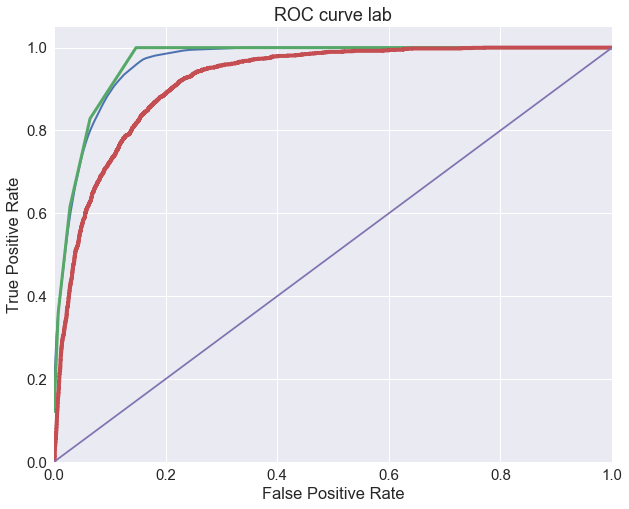

In [308]:
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_train, DT_y_hat_proba[:, 1], pos_label=1)
KN_fpr, KN_tpr, KN_thresholds = roc_curve(y_train, KN_y_hat_proba[:, 1], pos_label=1)
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_train, LR_y_hat_proba[:, 1], pos_label=1)
plt.plot(DT_fpr, DT_tpr, lw=2, label='DT_ ROC curve')
plt.plot(KN_fpr, KN_tpr, lw=3, label='KN_ ROC curve')
plt.plot(LR_fpr, LR_tpr, lw=4, label='LR_ ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve lab')
#plt.savefig("ROC.png")
plt.show()

In [309]:
from sklearn.cross_validation import  cross_val_score

scores = cross_val_score(model_DT, X_train, y_train, cv = 10)
itog_val = pd.DataFrame([['DecisionTreeClassifier',scores.mean()]], columns=['model', 'scores'])

scores = cross_val_score(model_KN, X_train, y_train, cv = 10)
itog_val = itog_val.append(pd.DataFrame([['KNeighborsClassifier',scores.mean()]], columns=['model', 'scores']))

scores = cross_val_score(model_LR, X_train, y_train, cv = 10)
itog_val = itog_val.append(pd.DataFrame([['LogisticRegression',scores.mean()]], columns=['model', 'scores']))

In [310]:
itog_val.head()

,model,scores
0,DecisionTreeClassifier,0.908835
0,KNeighborsClassifier,0.905308
0,LogisticRegression,0.907851


In [311]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits=5)

param_grid = {    
    'metric': ['minkowski','euclidean','manhattan'],
    'weights': ['uniform','distance'],
    'n_neighbors': list(range(2, 10)),
}

param_grid = {'metric': ['manhattan'], 'n_neighbors': [30, 50, 70], 'weights': ['uniform']}

'''
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
'''           

grid_search_KN = GridSearchCV(model_KN, param_grid=param_grid, cv=cv, scoring='roc_auc', refit=True, n_jobs=-1, verbose=10)

grid_search_KN.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    4.9s remaining:   32.1s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    6.7s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    9.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   12.9s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   13.2s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   13.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'metric': ['manhattan'], 'n_neighbors': [30, 50, 70], 'weights': ['uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [312]:
print(grid_search_KN.best_score_)
print(grid_search_KN.best_params_)

0.9309338691877477
{'metric': 'manhattan', 'n_neighbors': 70, 'weights': 'uniform'}


In [314]:
# подобранные варианты: {'metric': 'manhattan', 'n_neighbors': 70, 'weights': 'uniform'}

model_KN2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 70, weights = 'uniform')
model_KN2.fit(X_train,y_train)

Y_test_KN = model_KN2.predict(X_test)
Y_test_KN_proba = model_KN2.predict_proba(X_test)

In [319]:
df_test_prep = preproc_data(df_test)

In [321]:
df_test_prep.head().T

,0,1,2,3,4
_id,66810d8e6bf2b41c880a7bc6c8a1e295,ccac3879652b08cb8b44c1920fd93afa,fcccab4d7a76f70647f015f2c84c2af8,ed8399278c30678dab739045fa12b440,1d4d62ac5cabcb48bac7112813f290cb
age,57,55,33,36,27
education,5,0,3,5,5
default,0,-1,0,0,0
housing,0,1,0,0,1
loan,1,0,0,0,0
duration,371,285,52,355,189
campaign,1,2,1,4,2
pdays,999,999,999,999,999
previous,1,0,1,0,0


In [324]:
X_test_f = df_test_prep.drop(['_id'], axis=1).values
Y_test_KN_f = model_KN2.predict(X_test_f)
Y_test_KN_proba_f = model_KN2.predict_proba(X_test_f)

In [329]:
Y_test_KN_proba_f

array([[0.88571429, 0.11428571],
       [0.97142857, 0.02857143],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [332]:
result_KN = df_test_prep.loc[:,('_id',)]
#берем единички
result_KN['target'] = list(map(lambda x: x[1], Y_test_KN_proba_f))
#result_KN['target'] = Y_test_KN_f
result_KN.to_csv('result_RFC.csv', index=False)